<a href="https://colab.research.google.com/github/mojtabaSefidi/Spam-Message-Recognition/blob/main/Spam_Message_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Recognition

The SMS Spam Collection is a set of SMS tagged messages that have been collected for
SMS Spam research. It contains one set of SMS messages in English of 5,574 messages,
tagged acording being ham (legitimate) or spam.

<b> purpose : Design Model for recognize Spam messages </b>

## Import the relevant libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from string import punctuation
sn.set()

## Load the Dataset

In [8]:
!gdown --id 1gU5LpNVzIesIDPP8vHVqDKRX0btb9fNb
sms_dataset = pd.read_csv("Spam_Sms_DataSet.txt", sep='\t')
sms_dataset.head()

Downloading...
From: https://drive.google.com/uc?id=1gU5LpNVzIesIDPP8vHVqDKRX0btb9fNb
To: /content/Spam_Sms_DataSet.txt
100% 478k/478k [00:00<00:00, 31.6MB/s]


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Visualization

In [9]:
sms_dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


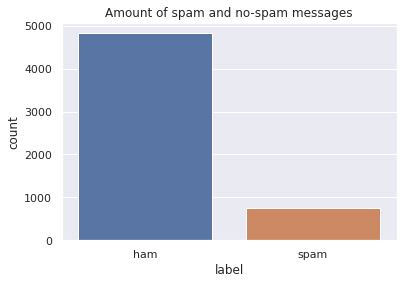

In [10]:
sn.countplot(data = sms_dataset, x= sms_dataset["label"]).set_title("Amount of spam and no-spam messages")
plt.show()

## PreProcessing

In [11]:

print(list(punctuation))

def lowercase_strip(string):
    for sign in list (punctuation):
        string = string.lower().replace(sign," ")
    return string

def word_count(string):
    return len(string.split())

def char_count(string):
    return len(list(string))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


#### Count Number of Words & Character in each message

In [12]:
sms_dataset["label"] = sms_dataset["label"].map({'ham':0,"spam":1})
sms_dataset['message'] = sms_dataset.message.apply(lowercase_strip)
sms_dataset['Number of Words'] = sms_dataset.message.apply(word_count)
sms_dataset['Number of Character'] = sms_dataset.message.apply(char_count)

In [13]:
sms_dataset.head()

,label,message,Number of Words,Number of Character
0,0,go until jurong point crazy available only ...,20,111
1,0,ok lar joking wif u oni,6,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,33,155
3,0,u dun say so early hor u c already then say,11,49
4,0,nah i don t think he goes to usf he lives aro...,14,61


### New Feature Visualization

In [14]:
sms_dataset.describe()

,label,Number of Words,Number of Character
count,5572.000000,5572.000000,5572.000000
mean,0.134063,16.205492,80.489950
std,0.340751,11.785339,59.942907
min,0.000000,0.000000,2.000000
25%,0.000000,8.000000,36.000000
50%,0.000000,13.000000,62.000000
75%,0.000000,24.000000,122.000000
max,1.000000,190.000000,910.000000


#### Words Count : Ham vs Spam

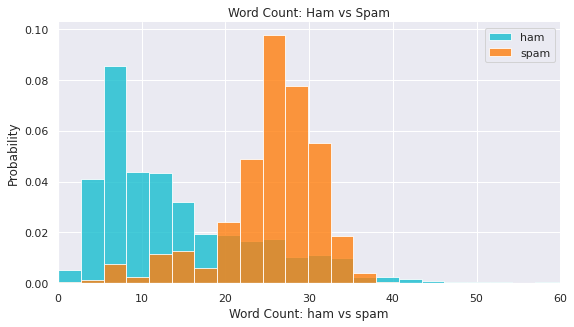

In [15]:
fig = plt.figure(figsize=(9,12))
ax1 = fig.add_subplot(2, 1, 2)
bins = np.histogram(np.hstack((sms_dataset.loc[sms_dataset.label==0]['Number of Words'], sms_dataset.loc[sms_dataset.label==1]['Number of Words'])), bins=70)[1]
plt.hist(sms_dataset.loc[sms_dataset.label==0]['Number of Words'], bins, density=True, color='#17becf', alpha=0.8, label='ham')
plt.hist(sms_dataset.loc[sms_dataset.label==1]['Number of Words'], bins, density=True, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 60)
plt.xlabel('Word Count: ham vs spam')
plt.ylabel('Probability')
plt.title('Word Count: Ham vs Spam')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.5)

#### Characters Count : Ham vs Spam

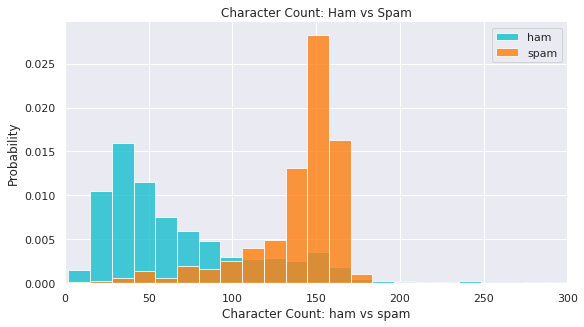

In [16]:
fig = plt.figure(figsize=(9,12))
ax2 = fig.add_subplot(2, 1, 2)
bins = np.histogram(np.hstack((sms_dataset.loc[sms_dataset.label==0]["Number of Character"], sms_dataset.loc[sms_dataset.label== 1]["Number of Character"])), bins=70)[1]
plt.hist(sms_dataset.loc[sms_dataset.label== 0]["Number of Character"], bins, density=True, color='#17becf', alpha=0.8, label='ham')
plt.hist(sms_dataset.loc[sms_dataset.label== 1]["Number of Character"], bins, density=True, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 300)
plt.xlabel('Character Count: ham vs spam')
plt.ylabel('Probability')
plt.title('Character Count: Ham vs Spam')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.5)

#### Specify Features & Target

In [17]:
x = sms_dataset[["Number of Words","Number of Character"]]
y = sms_dataset[['label']]

#### Feature Scaling

In [18]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

#### Split the Dataset to Train & Test Dataset

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, shuffle=True)

## Dealing with Outliers
#### purpose : delete 1% of dataset (outliers)

In [20]:
data_with_outlier = pd.DataFrame({"Number of Words": x_train[:, 0],"Number of Character": x_train[:, 1]})
data_with_outlier["label"] = pd.DataFrame.from_records(y_train)
data_with_outlier

,Number of Words,Number of Character,label
0,-0.866026,-0.925796,0
1,0.576574,0.926132,1
2,-0.696308,-0.758956,0
3,0.831150,1.076288,1
4,-0.696308,-0.809008,0
...,...,...,...
4452,-0.272014,-0.341855,0
4453,-0.272014,-0.091595,0
4454,-0.866026,-0.825692,0
4455,-0.866026,-0.959165,0


In [21]:
data_with_outlier.describe()

,Number of Words,Number of Character,label
count,4457.000000,4457.000000,4457.000000
mean,0.006419,0.006365,0.135293
std,1.022465,1.020062,0.342074
min,-1.375179,-1.309529,0.000000
25%,-0.696308,-0.742272,0.000000
50%,-0.272014,-0.308487,0.000000
75%,0.661433,0.709239,0.000000
max,14.747993,13.839577,1.000000


#### Before Deletion

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


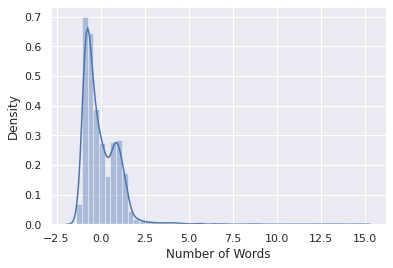

In [22]:
sn.distplot(data_with_outlier["Number of Words"])

#### After Deletion

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


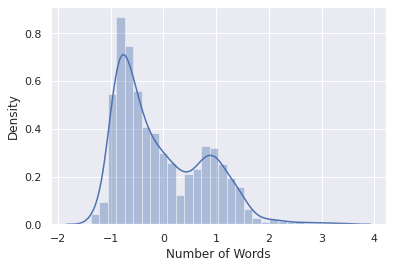

In [23]:
q = data_with_outlier["Number of Words"].quantile(0.99)
data_with_outlier = data_with_outlier[data_with_outlier["Number of Words"]<q]
sn.distplot(data_with_outlier["Number of Words"])

#### Before Deletion

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


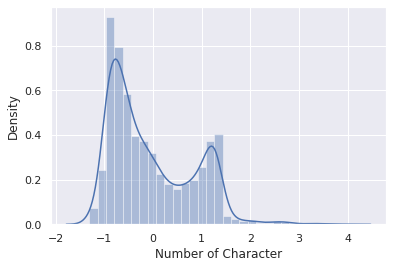

In [24]:
sn.distplot(data_with_outlier["Number of Character"])

#### After Deletion

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


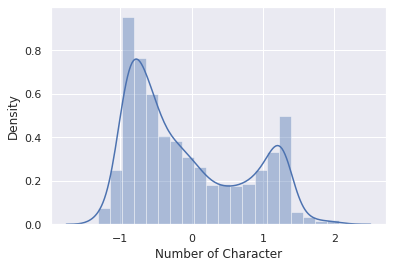

In [25]:
q = data_with_outlier["Number of Character"].quantile(0.99)
data_with_outlier = data_with_outlier[data_with_outlier["Number of Character"]<q]
sn.distplot(data_with_outlier["Number of Character"])


In [26]:
clean_data = data_with_outlier.reset_index(drop=True)

In [27]:
clean_data.describe()

,Number of Words,Number of Character,label
count,4366.000000,4366.000000,4366.000000
mean,-0.077729,-0.075820,0.137884
std,0.789088,0.802039,0.344817
min,-1.375179,-1.309529,0.000000
25%,-0.781167,-0.758956,0.000000
50%,-0.356873,-0.341855,0.000000
75%,0.576574,0.638332,0.000000
max,2.613185,2.060646,1.000000
